Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


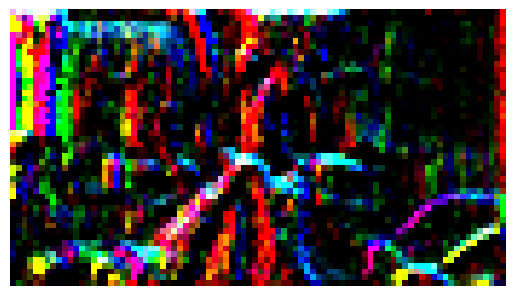

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import torch
def calc_pca(emb, vis=False):
    X = emb.flatten(0, -2).cpu().numpy()
    np.random.seed(80)
    pca = PCA(n_components=3)
    pca.fit(X)
    X_rgb = pca.transform(X).reshape(*emb.shape[:2], 3)
    if vis:
        plt.imshow(X_rgb)
        plt.axis("off")
        plt.show()
    return X_rgb

# agg_feat_2d = np.load("out/agg_feat_2d.npy")
# agg_feat_2d = torch.from_numpy(agg_feat_2d)
# calc_pca(agg_feat_2d, vis=True)

cnn_feat_2d = np.load('fig/cnn_feat_2d_out_conv2.npy')# [b, c, h, w]
cnn_feat_2d = torch.from_numpy(cnn_feat_2d[0]).permute(1,2,0)
res = calc_pca(cnn_feat_2d, vis=True)

# cnn_feat_2d = np.load('B_H_W_-1.npy')# [b, c, h, w]
# cnn_feat_2d = torch.from_numpy(cnn_feat_2d[0])
# res = calc_pca(cnn_feat_2d, vis=True)
# print(res.shape)

In [11]:
import torch
import torch.nn.functional as F

# 创建一个示例图像，假设为 (batch_size, channels, height, width)
image = torch.tensor([
    [[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],  # 一个示例图像
    [[[10, 11, 12], [13, 14, 15], [16, 17, 18]]]
], dtype=torch.float32)

# 应用平均池化降采样
pool_size = 2  # 池化窗口大小
avg_pooled_image = F.avg_pool2d(image, pool_size)

print("原始图像：")
print(image.shape)
print("降采样后的图像：")
print(avg_pooled_image.shape)


原始图像：
torch.Size([2, 1, 3, 3])
降采样后的图像：
torch.Size([2, 1, 1, 1])
